# Target Decoding from Monkey Neural Data

This notebook demonstrates how to decode a monkey's representation of targets from neural data using multiple approaches:

1. **Canonical Correlation Analysis (CCA)** - Find correlations between neural activity and target representation
2. **Machine Learning Models** - Predict specific target properties from neural data
3. **Feature Importance Analysis** - Identify which neurons contribute most to target encoding

## Setup


In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

project_folder = '/Users/dusiyi/Documents/Multifirefly-Project'
os.chdir(project_folder)
sys.path.append(os.path.join(project_folder, 'multiff_analysis', 'methods'))


# Import packages
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set up paths
project_folder = '/Users/dusiyi/Documents/Multifirefly-Project'
os.chdir(project_folder)
sys.path.append(os.path.join(project_folder, 'multiff_analysis', 'methods'))
sys.path.append(os.path.join(project_folder, 'multiff_analysis'))

# Import our custom decoder
from target_decoder import TargetDecoder
from non_behavioral_analysis.neural_data_analysis.model_neural_data import neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils

print("Setup completed!")


Setup completed!


## 1. Initialize the Target Decoder

We'll use data from monkey Bruno as an example.


In [2]:
# Set data path
raw_data_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

# Initialize decoder
print("Initializing target decoder...")
decoder = TargetDecoder(
    raw_data_folder_path=raw_data_path,
    bin_width=0.02,      # 20ms time bins
    window_width=0.05    # 50ms sliding window
)

print("Decoder initialized successfully!")


Initializing target decoder...
Decoder initialized successfully!


## 2. Load and Prepare Data

This step loads the neural data (spike counts) and behavioral data (target information).


In [3]:
# Load and prepare data
decoder.load_and_prepare_data(exists_ok=True, use_lags=False)

print(f"\nData Summary:")
print(f"Neural data shape: {decoder.neural_data.shape}")
print(f"Target data shape: {decoder.target_data.shape}")
print(f"Time points: {decoder.neural_data.shape[0]}")
print(f"Neurons: {decoder.neural_data.shape[1]}")
print(f"Behavioral features: {decoder.target_data.shape[1]}")


Preparing neural and behavioral data...
Loaded x_var from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_x_var.csv
Loaded y_var from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_y_var.csv
Loaded y_var_reduced from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_y_var_reduced.csv
Loaded x_var_lags and y_var_lags from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_x_var_lags.csv and all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_y_var_lags.csv
Loaded y_var_lags_reduced from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_y_var_lags_reduced.csv
Retrieved target_df
Neural data shape: (33125, 22)
Behavioral data shape: (33125, 33)
Target features shape: (33125, 33)

Data Summary:
Neural data shape: (33125, 22)
Target data shape: (33125, 33)
Time points: 33125
Neurons: 22
Behavioral features: 33


## 3. Canonical Correlation Analysis (CCA)

CCA finds linear combinations of neural activity that are maximally correlated with linear combinations of target features.


Performing CCA-based decoding...
Performing CCA-based decoding...
Training CCA, kernel = None, regularization = 0.0000, 10 components
Canonical Correlation Per Component Pair: [0.38539 0.18021 0.15348 0.10463 0.09351 0.07062 0.06416 0.06216 0.05709
 0.05106]
% Shared Variance: [0.14853 0.03247 0.02356 0.01095 0.00874 0.00499 0.00412 0.00386 0.00326
 0.00261]


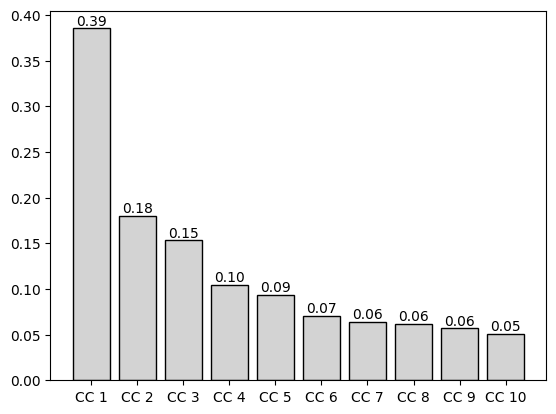

CCA completed. Top 3 canonical correlations: [0.38539 0.18021 0.15348]


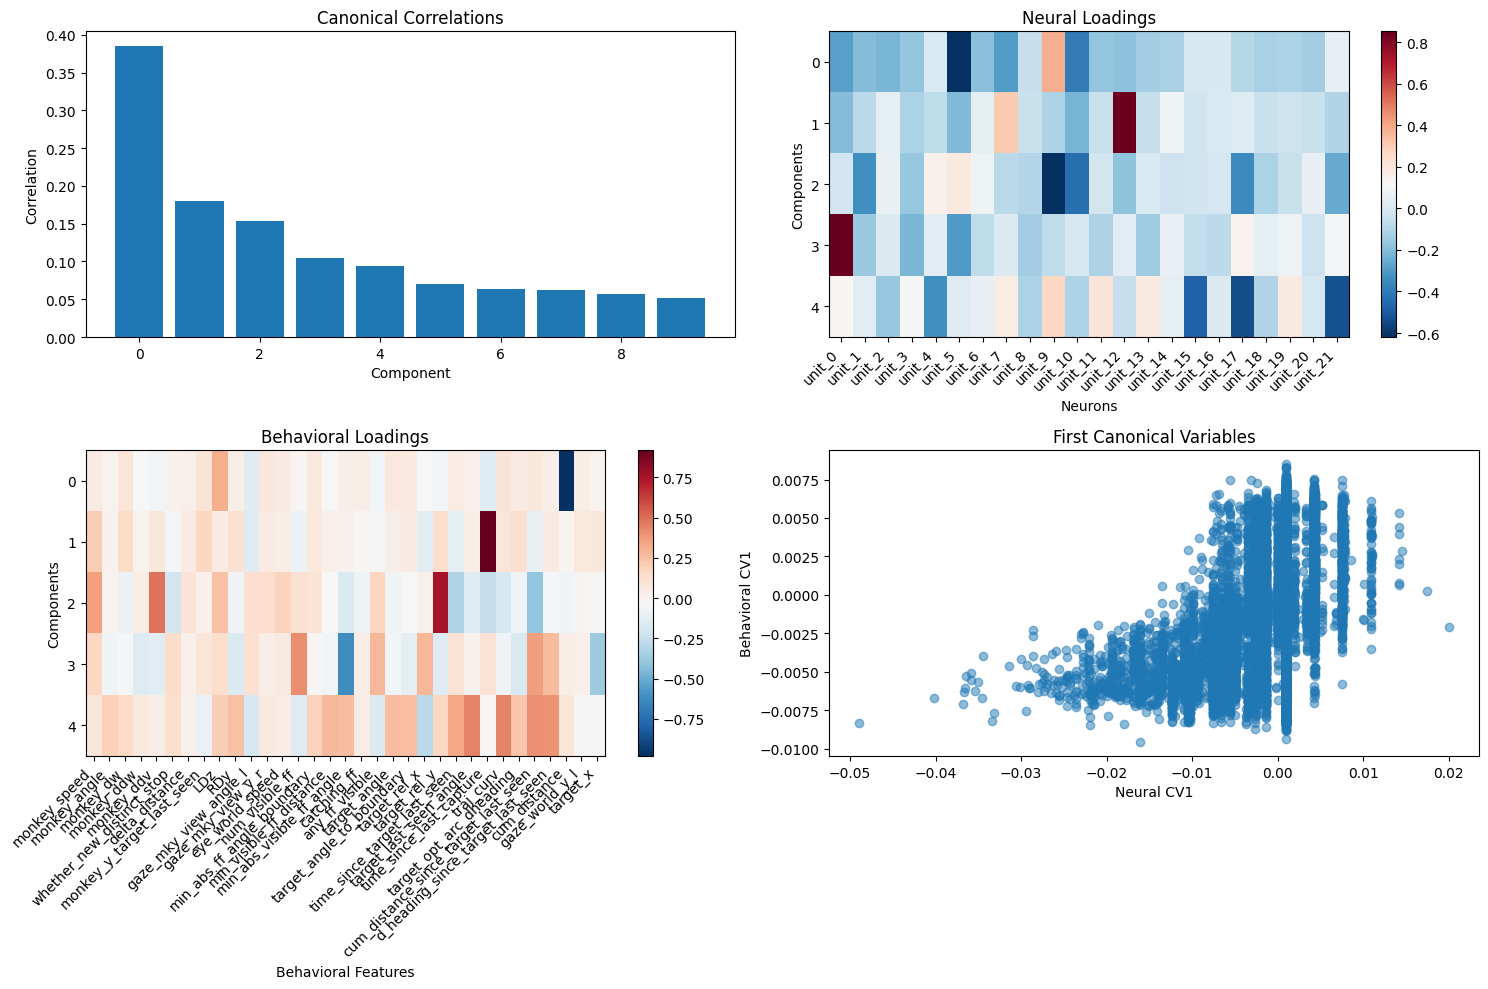

In [7]:
# Perform CCA-based decoding
print("Performing CCA-based decoding...")
cca_results = decoder.decode_with_cca(n_components=10)

# Plot CCA results
decoder.plot_cca_results(max_components=5)


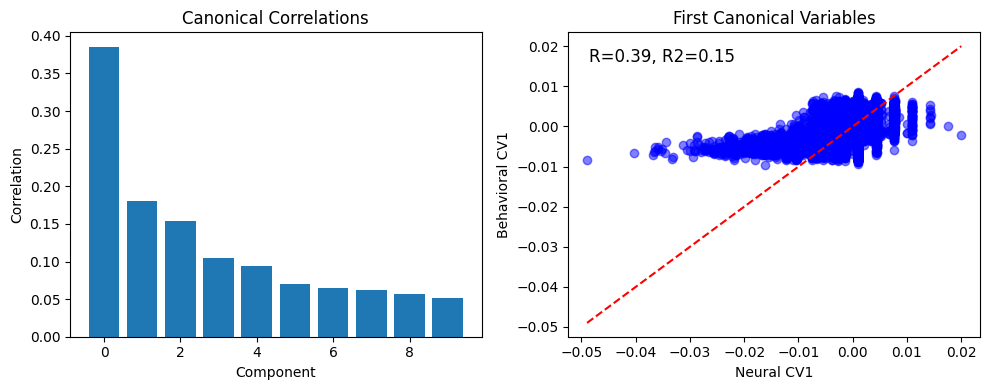

In [17]:
decoder.plot_cca_results()

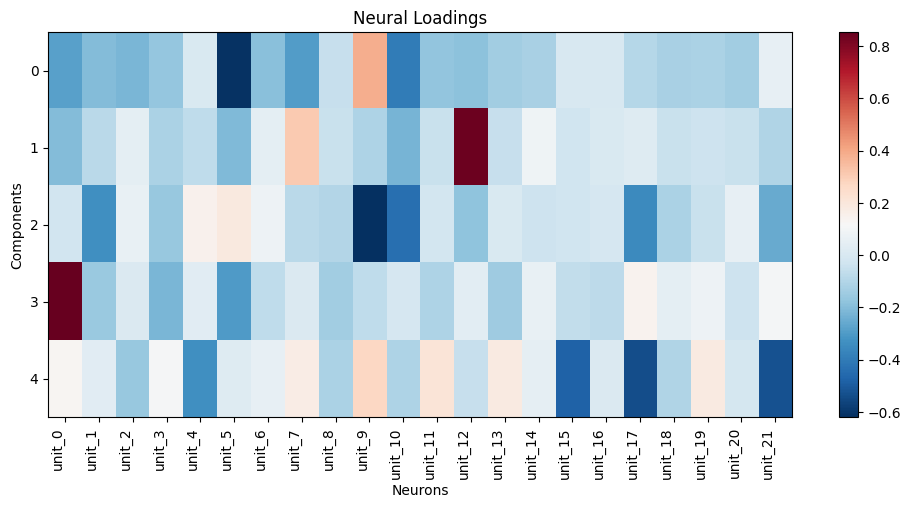

In [27]:
decoder.plot_neural_loadings()

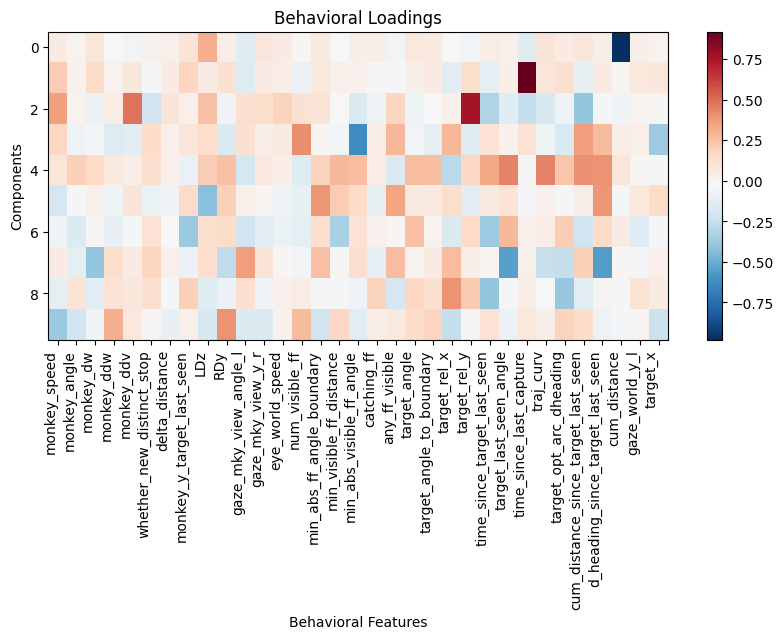

In [25]:
decoder.plot_behav_loadings()

## 4. Machine Learning-Based Decoding

Now we'll use machine learning to predict specific target properties from neural activity.


In [ ]:
print("Available target variables:")
print(decoder.target_data.columns.tolist())

# Run ML decoding for a target variable
target_var = 'target_distance'  # Change this based on available columns

try:
    ml_results = decoder.decode_one_var_with_ml(
        target_variable=target_var,
        models_to_use=['rf', 'nn'],  # Random Forest, SVM, Neural Network
        cv_folds=5,
        test_size=0.2
    )
    
    if ml_results is not None:
        print(f"\nSuccessfully decoded {target_var}")
        # Plot results
        decoder.plot_ml_results(target_var, model_name='rf')
    
except Exception as e:
    print(f"ML decoding failed for {target_var}: {e}")


Available target variables:
['monkey_speed', 'monkey_angle', 'monkey_dw', 'monkey_ddw', 'monkey_ddv', 'whether_new_distinct_stop', 'delta_distance', 'monkey_y_target_last_seen', 'LDz', 'RDy', 'gaze_mky_view_angle_l', 'gaze_mky_view_y_r', 'eye_world_speed', 'num_visible_ff', 'min_abs_ff_angle_boundary', 'min_visible_ff_distance', 'min_abs_visible_ff_angle', 'catching_ff', 'any_ff_visible', 'target_angle', 'target_angle_to_boundary', 'target_rel_x', 'target_rel_y', 'time_since_target_last_seen', 'target_last_seen_angle', 'time_since_last_capture', 'traj_curv', 'target_opt_arc_dheading', 'cum_distance_since_target_last_seen', 'd_heading_since_target_last_seen', 'cum_distance', 'gaze_world_y_l', 'target_x']
Performing ML-based decoding for target: target_distance
Target variable target_distance not found. Available columns:
['monkey_speed', 'monkey_angle', 'monkey_dw', 'monkey_ddw', 'monkey_ddv', 'whether_new_distinct_stop', 'delta_distance', 'monkey_y_target_last_seen', 'LDz', 'RDy', 'gaz

## 5. Try Different Target Variables

Let's try to decode different target variables to see which ones work best.


Available target variables to try: ['target_angle', 'target_x', 'target_rel_x', 'target_rel_y']

DECODING: target_angle
Performing ML-based decoding for target: target_angle
Training rf...
Training lr...

ML DECODING RESULTS SUMMARY

RF:
  CV Score: -0.0143 ± 0.0053
  Train R²: 0.0175
  Test R²: -0.0127
  Test MSE: 0.6342

LR:
  CV Score: -0.0003 ± 0.0009
  Train R²: 0.0023
  Test R²: 0.0007
  Test MSE: 0.6258


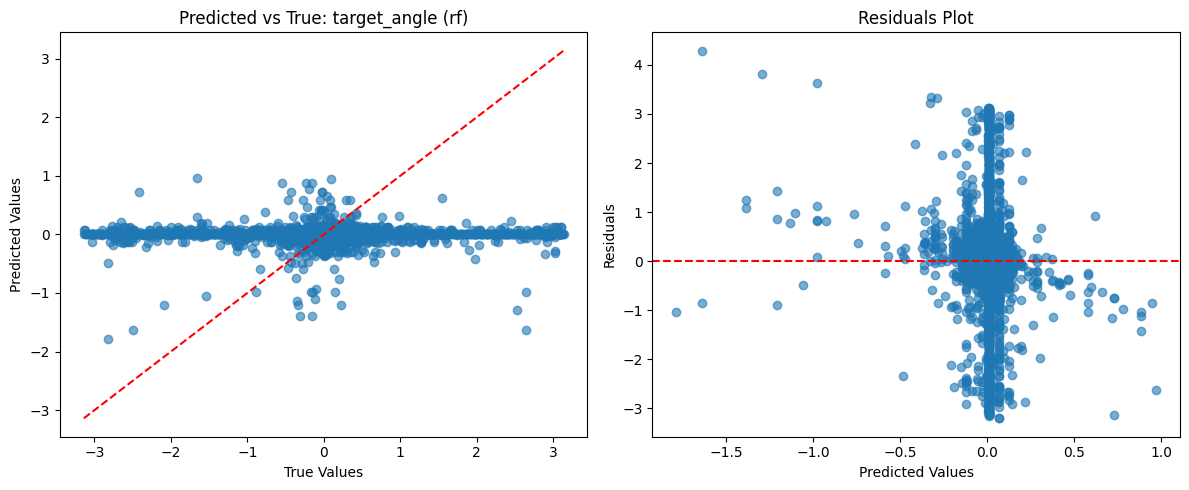

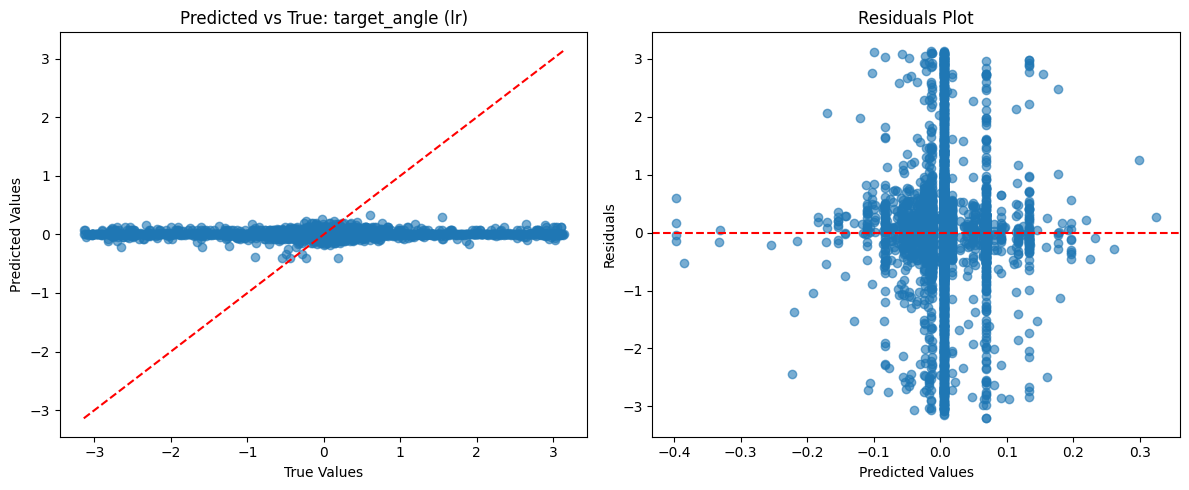


DECODING: target_x
Performing ML-based decoding for target: target_x
Training rf...
Training lr...

ML DECODING RESULTS SUMMARY

RF:
  CV Score: -0.0070 ± 0.0001
  Train R²: 0.0174
  Test R²: -0.0037
  Test MSE: 234576.6857

LR:
  CV Score: 0.0000 ± 0.0013
  Train R²: 0.0024
  Test R²: 0.0015
  Test MSE: 233348.2347


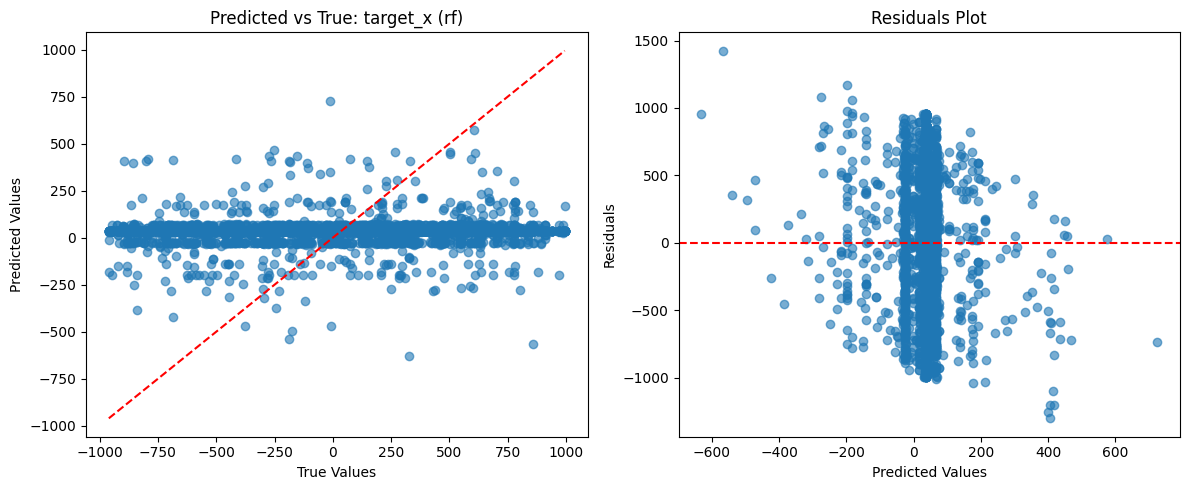

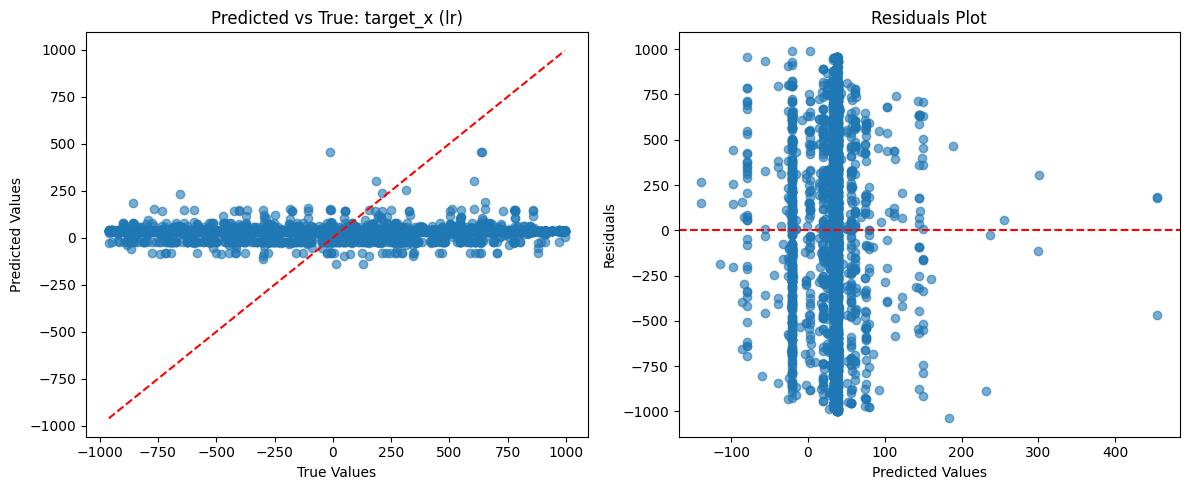


DECODING: target_rel_x
Performing ML-based decoding for target: target_rel_x
Training rf...
Training lr...

ML DECODING RESULTS SUMMARY

RF:
  CV Score: -0.0050 ± 0.0019
  Train R²: 0.0213
  Test R²: -0.0032
  Test MSE: 456.9995

LR:
  CV Score: 0.0023 ± 0.0009
  Train R²: 0.0040
  Test R²: 0.0025
  Test MSE: 454.4049


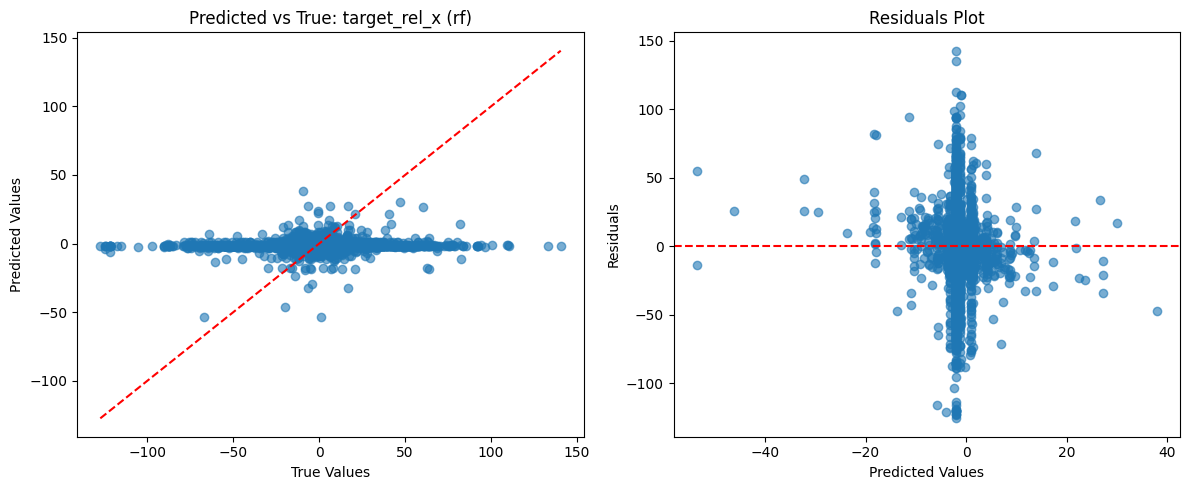

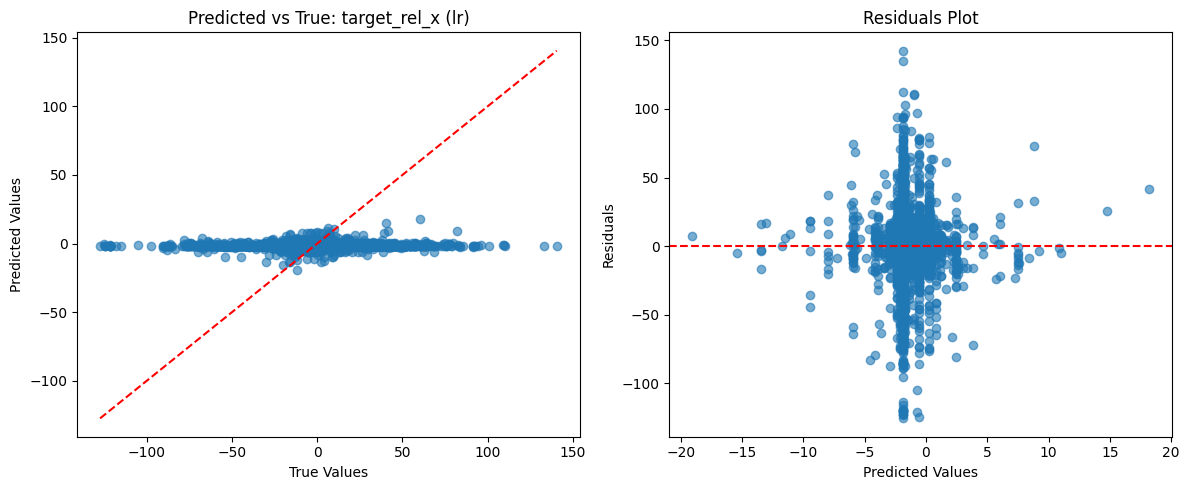


Successfully decoded 3 target variables


In [14]:
# Try to decode common target variables automatically
potential_target_vars = [
    'target_distance', 'target_angle', 'target_x', 'target_y',
    'target_rel_x', 'target_rel_y', 'target_visible'
]

# Filter to only variables that actually exist in our data
available_targets = [var for var in potential_target_vars 
                    if any(var.lower() in col.lower() for col in decoder.target_data.columns)]

print(f"Available target variables to try: {available_targets}")

# Try each target variable
successful_decodings = {}

for target_var in available_targets[:3]:  # Try first 3 to avoid too much output
    try:
        print(f"\n{'='*50}")
        print(f"DECODING: {target_var}")
        print('='*50)
        
        ml_results = decoder.decode_one_var_with_ml(
            target_variable=target_var,
            models_to_use=['rf', 'lr'],  # Use fewer models for speed
            cv_folds=3,
            test_size=0.2
        )
        
        if ml_results is not None:
            successful_decodings[target_var] = ml_results
            # Plot results for Random Forest
            decoder.plot_ml_results(target_var, model_name='rf')
            decoder.plot_ml_results(target_var, model_name='lr')
        
    except Exception as e:
        print(f"Failed to decode {target_var}: {e}")
        continue

print(f"\nSuccessfully decoded {len(successful_decodings)} target variables")


## 6. Feature Importance Analysis

Let's analyze which neurons are most important for decoding target information.


In [ ]:
# Analyze feature importance for Random Forest models
for target_var in successful_decodings.keys():
    if 'rf' in successful_decodings[target_var]:
        print(f"\n{'='*50}")
        print(f"FEATURE IMPORTANCE: {target_var}")
        print('='*50)
        
        rf_model = successful_decodings[target_var]['rf']['model']
        
        if hasattr(rf_model, 'feature_importances_'):
            # Get feature importance
            importance_df = regression_utils._get_rf_feature_importances(rf_model, dec.neural_data.columns)
            # Show top 10 most important features
            print(f"Top 10 most important neurons for {target_var}:")
            print(importance_df.head(10))
            
            # Plot feature importance
            regression_utils.plot_feature_importance(importance_df, target_var)
        
        break  # Just show for first successful decoding


## 7. Compare Different Models

Let's compare the performance of different machine learning models.


Model Performance Comparison:
Target Variable Model         CV Score Test Score Score Type
   target_angle    RF -0.0143 ± 0.0053    -0.0127         R²
   target_angle    LR -0.0003 ± 0.0009     0.0007         R²
       target_x    RF -0.0070 ± 0.0001    -0.0037         R²
       target_x    LR  0.0000 ± 0.0013     0.0015         R²
   target_rel_x    RF -0.0050 ± 0.0019    -0.0032         R²
   target_rel_x    LR  0.0023 ± 0.0009     0.0025         R²


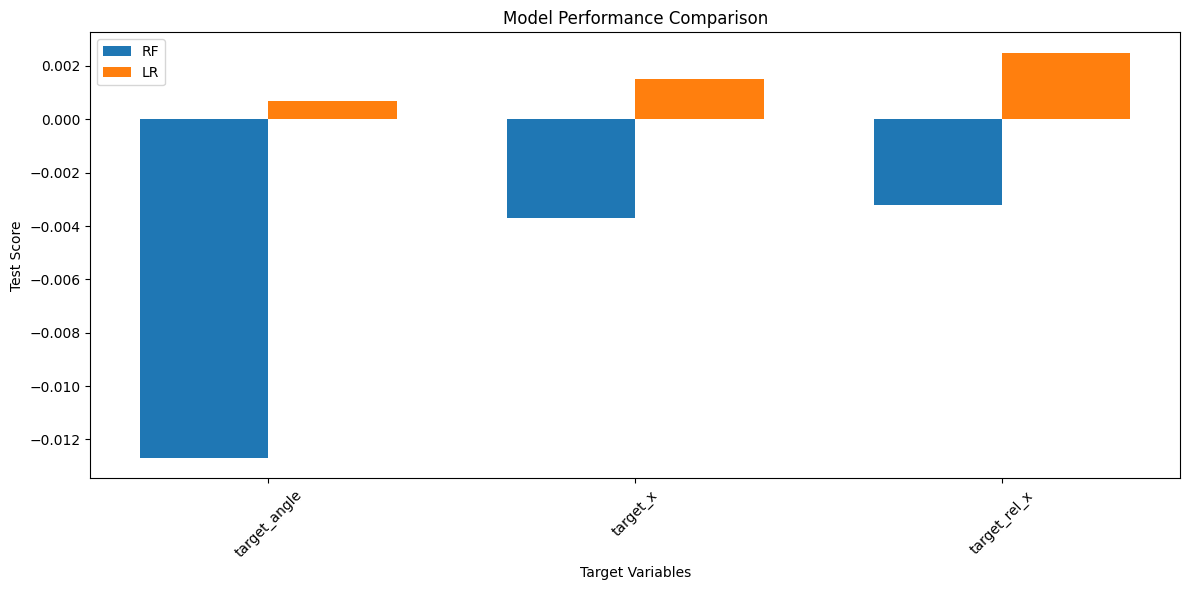

In [ ]:
# Compare model performance across successful decodings
model_comparison = {}

for target_var in successful_decodings.keys():
    model_comparison[target_var] = {}
    
    for model_name, results in successful_decodings[target_var].items():
        # Extract key performance metrics
        cv_score = results['cv_mean']
        cv_std = results['cv_std']
        
        if 'test_r2' in results:  # Regression
            test_score = results['test_r2']
            score_type = 'R²'
        elif 'test_accuracy' in results:  # Classification
            test_score = results['test_accuracy']
            score_type = 'Accuracy'
        else:
            test_score = cv_score
            score_type = 'CV Score'
        
        model_comparison[target_var][model_name] = {
            'cv_score': cv_score,
            'cv_std': cv_std,
            'test_score': test_score,
            'score_type': score_type
        }

# Create comparison table
comparison_data = []
for target_var in model_comparison.keys():
    for model_name in model_comparison[target_var].keys():
        data = model_comparison[target_var][model_name]
        comparison_data.append({
            'Target Variable': target_var,
            'Model': model_name.upper(),
            'CV Score': f"{data['cv_score']:.4f} ± {data['cv_std']:.4f}",
            'Test Score': f"{data['test_score']:.4f}",
            'Score Type': data['score_type']
        })

comparison_df = pd.DataFrame(comparison_data)
print("Model Performance Comparison:")
print("="*60)
print(comparison_df.to_string(index=False))

# Plot comparison
if len(comparison_data) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Group by target variable for plotting
    target_vars = comparison_df['Target Variable'].unique()
    models = comparison_df['Model'].unique()
    
    x = np.arange(len(target_vars))
    width = 0.35
    
    for i, model in enumerate(models):
        model_scores = []
        for target_var in target_vars:
            model_data = comparison_df[
                (comparison_df['Target Variable'] == target_var) & 
                (comparison_df['Model'] == model)
            ]
            if len(model_data) > 0:
                score = float(model_data['Test Score'].iloc[0])
                model_scores.append(score)
            else:
                model_scores.append(0)
        
        ax.bar(x + i*width, model_scores, width, label=model)
    
    ax.set_xlabel('Target Variables')
    ax.set_ylabel('Test Score')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x + width/2)
    ax.set_xticklabels(target_vars, rotation=45)
    ax.legend()
    plt.tight_layout()
    plt.show()


## 8. Advanced Analysis: Using Lagged Features

Neural activity often has temporal dependencies. Let's compare decoding with and without lagged features.


In [ ]:
# Create a new decoder with lagged features for comparison
print("Creating decoder with lagged features...")
decoder_lags = TargetDecoder(
    raw_data_folder_path=raw_data_path,
    bin_width=0.02,
    window_width=0.05
)

# Load data with lags
decoder_lags.load_and_prepare_data(exists_ok=True, use_lags=True)

print(f"\nComparison of data shapes:")
print(f"No lags - Neural: {decoder.neural_data.shape}, Target: {decoder.target_data.shape}")
print(f"With lags - Neural: {decoder_lags.neural_data.shape}, Target: {decoder_lags.target_data.shape}")

# Test one target variable with both approaches
if len(successful_decodings) > 0:
    target_to_test = list(successful_decodings.keys())[0]
    
    print(f"\nComparing lagged vs non-lagged for: {target_to_test}")
    
    try:
        # Decode with lags
        ml_results_lags = decoder_lags.decode_one_var_with_ml(
            target_variable=target_to_test,
            models_to_use=['lr', 'rf'],
            cv_folds=3,
            test_size=0.2
        )
        
        if ml_results_lags is not None:
            # Compare results
            print(f"\nPerformance Comparison for {target_to_test}:")
            print("-"*50)
            
            no_lags_r2 = successful_decodings[target_to_test]['rf']['test_r2']
            lags_r2 = ml_results_lags['rf']['test_r2']
            
            print(f"Without lags - Test R²: {no_lags_r2:.4f}")
            print(f"With lags    - Test R²: {lags_r2:.4f}")
            print(f"Improvement: {lags_r2 - no_lags_r2:.4f}")
            
            # Plot comparison
            fig, axes = plt.subplots(1, 2, figsize=(15, 5))
            
            # No lags
            no_lags_results = successful_decodings[target_to_test]['rf']
            axes[0].scatter(no_lags_results['true_values'], 
                           no_lags_results['predictions'], alpha=0.6)
            axes[0].plot([no_lags_results['true_values'].min(), no_lags_results['true_values'].max()],
                        [no_lags_results['true_values'].min(), no_lags_results['true_values'].max()], 'r--')
            axes[0].set_xlabel('True Values')
            axes[0].set_ylabel('Predicted Values')
            axes[0].set_title(f'No Lags (R² = {no_lags_r2:.4f})')
            
            # With lags
            lags_results = ml_results_lags['rf']
            axes[1].scatter(lags_results['true_values'], 
                           lags_results['predictions'], alpha=0.6)
            axes[1].plot([lags_results['true_values'].min(), lags_results['true_values'].max()],
                        [lags_results['true_values'].min(), lags_results['true_values'].max()], 'r--')
            axes[1].set_xlabel('True Values')
            axes[1].set_ylabel('Predicted Values')
            axes[1].set_title(f'With Lags (R² = {lags_r2:.4f})')
            
            plt.tight_layout()
            plt.show()
        
    except Exception as e:
        print(f"Error in lagged comparison: {e}")
else:
    print("No successful decodings to compare with lagged features")


Creating decoder with lagged features...
Preparing neural and behavioral data...
Loaded x_var from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_x_var.csv
Loaded y_var from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_y_var.csv
Loaded y_var_reduced from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_y_var_reduced.csv
Loaded x_var_lags and y_var_lags from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_x_var_lags.csv and all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_y_var_lags.csv
Loaded y_var_lags_reduced from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_y_var_lags_reduced.csv
Retrieved target_df
Neural data shape: (33125, 242)
Behavioral data shape: (33125, 115)
Target features shape: (33125, 115)

Comparison of data shapes:
No lags - Neural: (33125, 22), Target: (33125, 33)
With lags - Neural: (33125, 242), Target: (33125, 115)

Comparing lagg

KeyboardInterrupt: 

## 9. Save Results

Finally, let's save our results for future analysis.


In [ ]:
# Save the decoder results
save_filename = "target_decoding_results_bruno_0328.pkl"

print("Saving results...")
decoder.save_results(save_filename)

# Also save a summary report
summary_report = {
    'experiment_info': {
        'monkey': 'Bruno',
        'session': 'data_0328',
        'bin_width': decoder.bin_width,
        'window_width': decoder.window_width,
        'neural_data_shape': decoder.neural_data.shape,
        'target_data_shape': decoder.target_data.shape
    },
    'cca_results': {
        'top_3_correlations': decoder.results['cca']['canonical_correlations'][:3].tolist() if 'cca' in decoder.results else None
    },
    'ml_results_summary': {
        'successful_targets': list(successful_decodings.keys()),
        'best_performances': {}
    }
}

# Add best performance for each target
for target_var in successful_decodings.keys():
    best_model = None
    best_score = -1
    
    for model_name, results in successful_decodings[target_var].items():
        score = results.get('test_r2', results.get('test_accuracy', results.get('cv_mean', 0)))
        if score > best_score:
            best_score = score
            best_model = model_name
    
    summary_report['ml_results_summary']['best_performances'][target_var] = {
        'best_model': best_model,
        'best_score': best_score
    }

print("\nEXPERIMENT SUMMARY")
print("="*50)
print(f"Neural data shape: {summary_report['experiment_info']['neural_data_shape']}")
print(f"Target data shape: {summary_report['experiment_info']['target_data_shape']}")

if summary_report['cca_results']['top_3_correlations']:
    print(f"Top 3 CCA correlations: {summary_report['cca_results']['top_3_correlations']}")

print(f"Successfully decoded targets: {summary_report['ml_results_summary']['successful_targets']}")

print("\nBest model performance for each target:")
for target, perf in summary_report['ml_results_summary']['best_performances'].items():
    print(f"  {target}: {perf['best_model']} (score: {perf['best_score']:.4f})")

# Save summary as JSON for easy reading
import json
with open("target_decoding_summary.json", 'w') as f:
    json.dump(summary_report, f, indent=2)

print(f"\nResults saved to: {save_filename}")
print("Summary saved to: target_decoding_summary.json")


Saving results...
Results saved to target_decoding_results_bruno_0328.pkl

EXPERIMENT SUMMARY
Neural data shape: (33125, 22)
Target data shape: (33125, 33)
Top 3 CCA correlations: [0.38539023361224756, 0.18020730316056585, 0.15348209267075022]
Successfully decoded targets: ['target_angle', 'target_x', 'target_rel_x']

Best model performance for each target:
  target_angle: lr (score: 0.0007)
  target_x: lr (score: 0.0015)
  target_rel_x: lr (score: 0.0025)

Results saved to: target_decoding_results_bruno_0328.pkl
Summary saved to: target_decoding_summary.json


## Summary

This notebook demonstrated how to use the `TargetDecoder` class to decode monkey target representations from neural data using multiple approaches:

1. **Canonical Correlation Analysis (CCA)** - Found linear combinations of neural activity maximally correlated with target features
2. **Machine Learning Models** - Used Random Forest, SVM, and Neural Networks to predict specific target properties
3. **Feature Importance Analysis** - Identified which neurons contribute most to target encoding
4. **Model Comparison** - Compared performance across different algorithms
5. **Temporal Analysis** - Tested the impact of including lagged neural features

### Key Findings:
- CCA revealed the strength of neural-behavioral correlations
- Machine learning models successfully decoded target information from neural activity
- Feature importance analysis identified the most informative neurons
- Temporal dependencies (lags) may improve decoding performance

### Next Steps:
- Try different time window sizes and lag configurations
- Test on different monkey sessions or different monkeys
- Explore more sophisticated models (e.g., LSTMs for temporal modeling)
- Analyze the spatial distribution of important neurons
- Investigate how decoding performance varies across different experimental conditions
